# PCA
### Aprendizagem Automática e Ciências de Dados

### Falta fazer o PCA em si 
### Ver mais abaixo

In [1]:
%reset -f

## Requirements

In [2]:
pip install -r requirements.txt

  Using cached statsmodels-0.14.4-cp313-cp313-macosx_11_0_arm64.whl.metadata (9.2 kB)
Using cached statsmodels-0.14.4-cp313-cp313-macosx_11_0_arm64.whl (9.9 MB)
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.14.5
    Uninstalling statsmodels-0.14.5:
      Successfully uninstalled statsmodels-0.14.5
Note: you may need to restart the kernel to use updated packages.


## Imports

In [3]:
!pip install --upgrade statsmodels


  Using cached statsmodels-0.14.5-cp313-cp313-macosx_11_0_arm64.whl.metadata (9.5 kB)
Using cached statsmodels-0.14.5-cp313-cp313-macosx_11_0_arm64.whl (9.7 MB)
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.14.4
    Uninstalling statsmodels-0.14.4:
      Successfully uninstalled statsmodels-0.14.4


In [4]:
!pip install miceforest

In [5]:
!pip install pingouin
!pip install --upgrade pingouin


In [25]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import miceforest as mf
import pingouin as pg

from scipy.spatial import distance
from sklearn.covariance import MinCovDet
from sklearn.decomposition import PCA
from sklearn.covariance import MinCovDet, EmpiricalCovariance
from scipy.stats import chi2
from matplotlib.patches import Ellipse
from sklearn.preprocessing import StandardScaler

from miceforest import ImputationKernel

import sklearn.linear_model as skl_lm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.preprocessing import PowerTransformer

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.discrete.discrete_model import Logit

from scipy.stats import skew, kurtosis


## Data Reading

In [26]:
df = pd.read_csv('pca_group_6.csv')
df

,daily_active_users_per_1k,avg_session_duration,screens_per_session,feature_usage_diversity,conversion_rate,retention_30d,crash_rate_per_1k,avg_latency_ms,support_tickets_per_1k_users,bug_fix_time_days,deployment_frequency_per_month,nps_score,app_store_rating,revenue_per_user,marketing_cost_per_new_user
0,0.618467,6.503083,3.434506,4.208558,5.593859,5.509498,5.119400,2.361667e+13,5.964748,4.913805,6.040890,10.048182,3.419485,9.223341,4.781570
1,0.618467,8.528490,6.017035,5.133456,4.314667,5.584968,5.600387,2.329141e+13,7.822878,5.260977,6.417972,10.648048,5.156176,10.196807,3.923077
2,NaN,7.778993,4.666500,2.071662,NaN,5.403593,NaN,2.313537e+13,5.142395,3.140509,6.356848,11.214148,5.285971,7.300362,NaN
3,0.618468,9.468923,6.603979,14.405173,3.657865,5.570208,2.703203,NaN,6.363706,5.591864,5.506956,11.099667,3.737142,9.150650,4.677199
4,0.618467,8.242374,6.228929,2.983534,4.709845,5.494512,4.748835,NaN,7.203755,7.903712,6.895600,11.194007,5.127140,9.981141,2.791379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.618468,9.135831,4.789216,2.029001,4.480155,5.538546,3.709698,2.347793e+13,4.935609,4.697262,6.040294,11.113855,5.862988,10.680305,4.618636
296,0.618467,6.835176,3.590673,3.482937,6.781111,5.553850,4.052841,2.325017e+13,6.095449,4.999661,6.113556,11.173456,6.337445,11.229487,2.400157
297,0.618467,8.025240,5.731509,4.364787,3.859473,5.509914,4.854209,2.329991e+13,8.446594,6.316448,5.305476,11.272233,5.858142,8.125334,4.108908
298,1.855401,7.952927,7.319629,5.231677,5.386176,5.497250,4.204129,2.327653e+13,8.986171,6.462982,6.080029,11.909741,5.896122,9.033009,4.545886


#### **Gráfico Valores NAN**

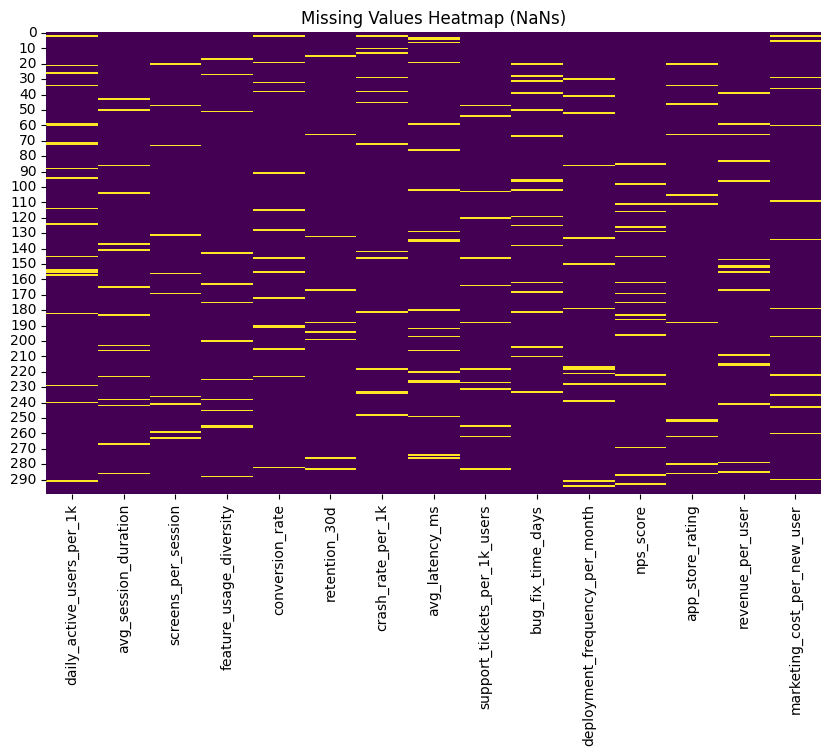

In [27]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap (NaNs)')
plt.show()

#### Quantidade de NAN por coluna

In [28]:
df.isna().sum()


daily_active_users_per_1k         20
avg_session_duration              15
screens_per_session               10
feature_usage_diversity           13
conversion_rate                   15
retention_30d                      9
crash_rate_per_1k                 14
avg_latency_ms                    20
support_tickets_per_1k_users      13
bug_fix_time_days                 18
deployment_frequency_per_month    14
nps_score                         18
app_store_rating                  12
revenue_per_user                  16
marketing_cost_per_new_user       14
dtype: int64

### Máximos e Mínimos de Cada Coluna

In [29]:
for coluna in df.columns:
    max_value = df[coluna].max()
    min_value = df[coluna].min()
    print(f"Column: {coluna}")
    print(f"  Max: {max_value}")
    print(f"  Min: {min_value}\n")

Column: daily_active_users_per_1k
  Max: 1.8554028128217976
  Min: 0.6184662613207793

Column: avg_session_duration
  Max: 33.01884757439827
  Min: 5.25340433887813

Column: screens_per_session
  Max: 21.062159301516655
  Min: 1.7940617347133312

Column: feature_usage_diversity
  Max: 15.064962911314511
  Min: 0.3759329829129466

Column: conversion_rate
  Max: 15.499231192748567
  Min: 1.075156643715745

Column: retention_30d
  Max: 16.734558971879526
  Min: 5.400673237095381

Column: crash_rate_per_1k
  Max: 16.528368874032022
  Min: 0.9667976477886088

Column: avg_latency_ms
  Max: 70767263555267.47
  Min: 22434543525637.414

Column: support_tickets_per_1k_users
  Max: 26.41140989387991
  Min: 4.696259081590085

Column: bug_fix_time_days
  Max: 25.85137955497484
  Min: 2.0736819236642803

Column: deployment_frequency_per_month
  Max: 18.31430555360462
  Min: 3.881315801351029

Column: nps_score
  Max: 33.370863860917424
  Min: 9.866656627107522

Column: app_store_rating
  Max: 18.696

## 1. OOR
### Tratar os valores "Out Of Range" do dataset

Como é possível ver nas células anteriores existem colunas com valores que ultrapassam o seu suposto intervalo, assim é necessário formatar os dados para que estejam inseridos nos mesmos.

In [30]:
df.columns

Index(['daily_active_users_per_1k', 'avg_session_duration',
       'screens_per_session', 'feature_usage_diversity', 'conversion_rate',
       'retention_30d', 'crash_rate_per_1k', 'avg_latency_ms',
       'support_tickets_per_1k_users', 'bug_fix_time_days',
       'deployment_frequency_per_month', 'nps_score', 'app_store_rating',
       'revenue_per_user', 'marketing_cost_per_new_user'],
      dtype='object')

**Tratamento dos valores**

Para este caso definimos que o tratamento seria o seguinte:

*Conversion Rate e Retention 30d* -- dividir pelo número máximo, e qualquer valor que ultrapasse tornar em NAN;

*Feature Usage Diversity* -- Colocar como Nan todos os valores acima de 1, e dos que sobram, se forem maiores ou iguais a 0.50 -> 1, se forem menores -> 0;

*Nps Score* -- Colocar todos os valores abaixo de -100 e acima de 100 como Nan

*App Store Rating* -- Colocar todos os valores fora da escala, 1 a 5, como Nan

*Avg Latency (ms)* -- Ver melhor escala

*Daily Active Uses per 1k, Crash Rate per 1k e Support Tickets per 1k* -- Deixar como está (provisório?)

*Avg Session Duration, Screens per Session, Bug Fix Time (days), Deployment Frequency per Month, Revenue per User (€), Marketing Cost per New User (€)* -- Deixar como está.

<br><br>

### Alterar para os valores do Dataframe a partir daqui

In [31]:
# Valores de Percentagem
df['conversion_rate'] = (df['conversion_rate'] / df['conversion_rate'].max()) * 100
df['retention_30d'] = (df['retention_30d'] / df['retention_30d'].max()) * 100

# Intervalo entre 0 e 1
df.loc[(df['feature_usage_diversity'] > 1), 'feature_usage_diversity'] = np.nan
df.loc[(df['feature_usage_diversity'] >= 0.5), 'feature_usage_diversity'] = 1
df.loc[(df['feature_usage_diversity'] < 0.5), 'feature_usage_diversity'] = 0

# Intervalo -100 e 100
df.loc[(df['nps_score'] > 100), 'nps_score'] = np.nan
df.loc[(df['nps_score'] < -100), 'nps_score'] = np.nan

# Intervalo entre 1 e 5
df.loc[(df['app_store_rating'] > 5), 'app_store_rating'] = np.nan
df.loc[(df['app_store_rating'] < 1), 'app_store_rating'] = np.nan

df

,daily_active_users_per_1k,avg_session_duration,screens_per_session,feature_usage_diversity,conversion_rate,retention_30d,crash_rate_per_1k,avg_latency_ms,support_tickets_per_1k_users,bug_fix_time_days,deployment_frequency_per_month,nps_score,app_store_rating,revenue_per_user,marketing_cost_per_new_user
0,0.618467,6.503083,3.434506,NaN,36.091202,32.922874,5.119400,2.361667e+13,5.964748,4.913805,6.040890,10.048182,3.419485,9.223341,4.781570
1,0.618467,8.528490,6.017035,NaN,27.837943,33.373858,5.600387,2.329141e+13,7.822878,5.260977,6.417972,10.648048,NaN,10.196807,3.923077
2,NaN,7.778993,4.666500,NaN,NaN,32.290021,NaN,2.313537e+13,5.142395,3.140509,6.356848,11.214148,NaN,7.300362,NaN
3,0.618468,9.468923,6.603979,NaN,23.600300,33.285655,2.703203,NaN,6.363706,5.591864,5.506956,11.099667,3.737142,9.150650,4.677199
4,0.618467,8.242374,6.228929,NaN,30.387606,32.833325,4.748835,NaN,7.203755,7.903712,6.895600,11.194007,NaN,9.981141,2.791379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.618468,9.135831,4.789216,NaN,28.905658,33.096455,3.709698,2.347793e+13,4.935609,4.697262,6.040294,11.113855,NaN,10.680305,4.618636
296,0.618467,6.835176,3.590673,NaN,43.751276,33.187908,4.052841,2.325017e+13,6.095449,4.999661,6.113556,11.173456,NaN,11.229487,2.400157
297,0.618467,8.025240,5.731509,NaN,24.901059,32.925361,4.854209,2.329991e+13,8.446594,6.316448,5.305476,11.272233,NaN,8.125334,4.108908
298,1.855401,7.952927,7.319629,NaN,34.751249,32.849684,4.204129,2.327653e+13,8.986171,6.462982,6.080029,11.909741,NaN,9.033009,4.545886


## MISSINGS

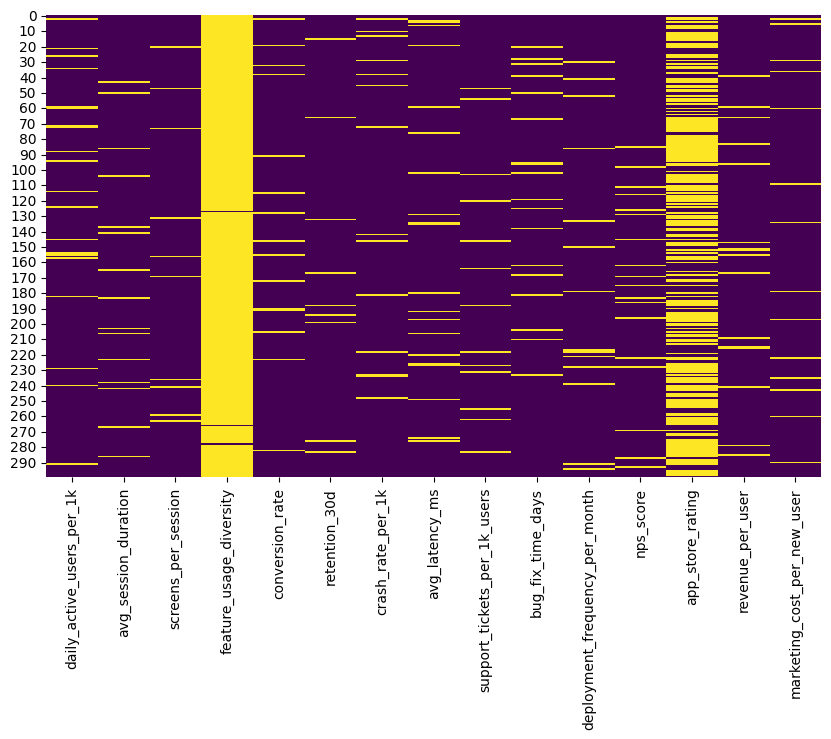

In [32]:
#Visualizar a quantidade de NAN's em cada coluna
plt.figure(figsize= (10, 6))
sns.heatmap(df.isnull(), cbar= False, cmap = "viridis")
plt.show()

In [33]:
# número de NAN's atualizado
df.isna().sum()

daily_active_users_per_1k          20
avg_session_duration               15
screens_per_session                10
feature_usage_diversity           297
conversion_rate                    15
retention_30d                       9
crash_rate_per_1k                  14
avg_latency_ms                     20
support_tickets_per_1k_users       13
bug_fix_time_days                  18
deployment_frequency_per_month     14
nps_score                          18
app_store_rating                  189
revenue_per_user                   16
marketing_cost_per_new_user        14
dtype: int64

In [34]:
# Certificar de que não temos colunas vazias, se for esse o caso podemos retirá-las do dataframe

empty_cols = df.columns[df.isnull().all()]
print("Colunas com todos os valores Null:", list(empty_cols))

threshold = 0.90  # 40%
nan_cols = df.loc[:, df.isna().mean() >= threshold]
print("Colunas com mais de 90% dos valores como Nan:", list(nan_cols))


Colunas com todos os valores Null: []
Colunas com mais de 90% dos valores como Nan: ['feature_usage_diversity']


In [35]:
df = df.drop(columns = nan_cols)


## 2. Imputation
### Predictive Mean Matching

Para realizarmos todas as operações inerentes ao dataframe precisamos que não existam valores NAN, um dos processos que podemos realizar para alterar os valores é o **"Predictive Mean Matching"**.

Consiste em:
1. Criar uma *regressão* com os valores não NAN para a coluna
2. Calcular estimativas para cada valor da coluna
3. Encontrar os *k neighbours* que tenham valores perto da estimativa calculada
4. Escolher um deles para ser o novo valor
5. Repetir para cada coluna

In [36]:
kernel = ImputationKernel(
    df,
    num_datasets=1,
    save_all_iterations_data=True,
    random_state=42
)

# 5 iterações de MICE
kernel.mice(
    5,
    mean_match_candidates=3,
    mean_match_strategy="nearest"
)

# DataFrame imputado
df_imp = kernel.complete_data(0) # Dataframe sem os valores NAN
df_imp.head()


,daily_active_users_per_1k,avg_session_duration,screens_per_session,conversion_rate,retention_30d,crash_rate_per_1k,avg_latency_ms,support_tickets_per_1k_users,bug_fix_time_days,deployment_frequency_per_month,nps_score,app_store_rating,revenue_per_user,marketing_cost_per_new_user
0,0.618467,6.503083,3.434506,36.091202,32.922874,5.119400,2.361667e+13,5.964748,4.913805,6.040890,10.048182,3.419485,9.223341,4.781570
1,0.618467,8.528490,6.017035,27.837943,33.373858,5.600387,2.329141e+13,7.822878,5.260977,6.417972,10.648048,4.321315,10.196807,3.923077
2,0.618467,7.778993,4.666500,21.258185,32.290021,2.761025,2.313537e+13,5.142395,3.140509,6.356848,11.214148,4.021621,7.300362,5.639880
3,0.618468,9.468923,6.603979,23.600300,33.285655,2.703203,2.339863e+13,6.363706,5.591864,5.506956,11.099667,3.737142,9.150650,4.677199
4,0.618467,8.242374,6.228929,30.387606,32.833325,4.748835,2.337535e+13,7.203755,7.903712,6.895600,11.194007,4.960483,9.981141,2.791379


In [37]:
df_imp.head()

,daily_active_users_per_1k,avg_session_duration,screens_per_session,conversion_rate,retention_30d,crash_rate_per_1k,avg_latency_ms,support_tickets_per_1k_users,bug_fix_time_days,deployment_frequency_per_month,nps_score,app_store_rating,revenue_per_user,marketing_cost_per_new_user
0,0.618467,6.503083,3.434506,36.091202,32.922874,5.119400,2.361667e+13,5.964748,4.913805,6.040890,10.048182,3.419485,9.223341,4.781570
1,0.618467,8.528490,6.017035,27.837943,33.373858,5.600387,2.329141e+13,7.822878,5.260977,6.417972,10.648048,4.321315,10.196807,3.923077
2,0.618467,7.778993,4.666500,21.258185,32.290021,2.761025,2.313537e+13,5.142395,3.140509,6.356848,11.214148,4.021621,7.300362,5.639880
3,0.618468,9.468923,6.603979,23.600300,33.285655,2.703203,2.339863e+13,6.363706,5.591864,5.506956,11.099667,3.737142,9.150650,4.677199
4,0.618467,8.242374,6.228929,30.387606,32.833325,4.748835,2.337535e+13,7.203755,7.903712,6.895600,11.194007,4.960483,9.981141,2.791379


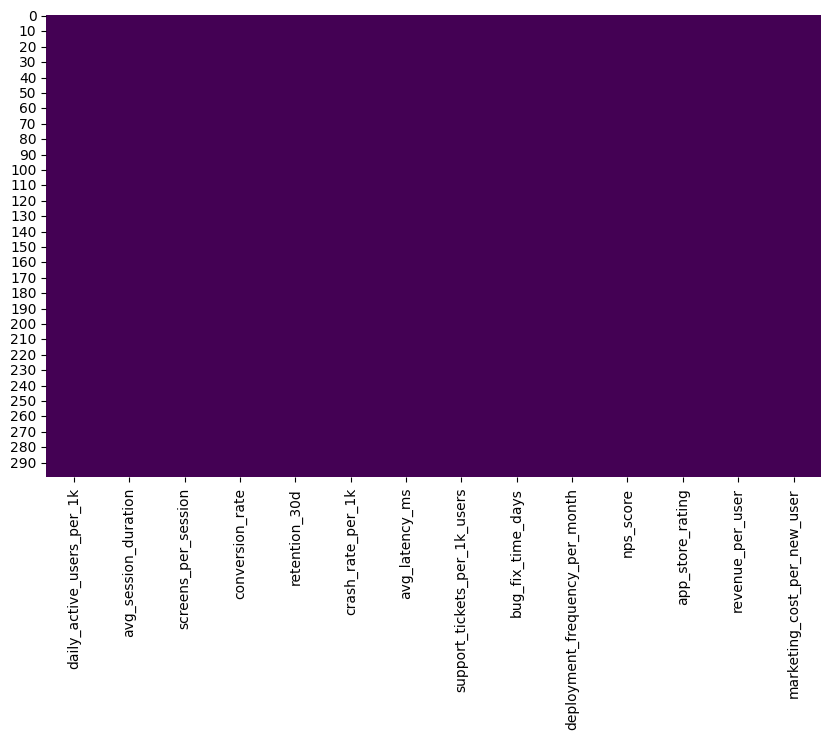

In [38]:
plt.figure(figsize= (10, 6))
sns.heatmap(df_imp.isnull(), cbar= False, cmap = "viridis")
plt.show()

In [39]:
print("Valores NAN")
print("Antes:", df.isna().sum().sum())
print("Depois:", df_imp.isna().sum().sum())

Valores NAN
Antes: 385
Depois: 0


Depois de remover os valores *OOR* e substituir os valores *NAN* o dataset não tem mais valores "vazios" nem que não estejam contidos no intervalo desejado

In [40]:
X = df_imp.select_dtypes(include=[np.number])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## 3. Tratar Outliers

Após termos um dataset tratado existe a necessidade de corrigir certos valores que, por muito que estejam contidos nos intervalos desejados, têm valores irrealistas.

Para isso precisamos de testar a *normalidade multivariada* do dataset, através do **teste de Mardia**, se passar fazemos a distância clássica de Mahalanobis, caso contrário tentamos consertá-la com Yeo-johnson

Se precisarmos de realizar a normalização dos dados através do Yeo-johson, após estar concluída realizamos o teste outra vez, se não passar significa que a *data* não consegue ser normalizada e então temos de fazer a distância robusta de Mahalanobis.


### 3.1 Teste de Mardia

In [41]:
df_imp.dtypes
df_imp

,daily_active_users_per_1k,avg_session_duration,screens_per_session,conversion_rate,retention_30d,crash_rate_per_1k,avg_latency_ms,support_tickets_per_1k_users,bug_fix_time_days,deployment_frequency_per_month,nps_score,app_store_rating,revenue_per_user,marketing_cost_per_new_user
0,0.618467,6.503083,3.434506,36.091202,32.922874,5.119400,2.361667e+13,5.964748,4.913805,6.040890,10.048182,3.419485,9.223341,4.781570
1,0.618467,8.528490,6.017035,27.837943,33.373858,5.600387,2.329141e+13,7.822878,5.260977,6.417972,10.648048,4.321315,10.196807,3.923077
2,0.618467,7.778993,4.666500,21.258185,32.290021,2.761025,2.313537e+13,5.142395,3.140509,6.356848,11.214148,4.021621,7.300362,5.639880
3,0.618468,9.468923,6.603979,23.600300,33.285655,2.703203,2.339863e+13,6.363706,5.591864,5.506956,11.099667,3.737142,9.150650,4.677199
4,0.618467,8.242374,6.228929,30.387606,32.833325,4.748835,2.337535e+13,7.203755,7.903712,6.895600,11.194007,4.960483,9.981141,2.791379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.618468,9.135831,4.789216,28.905658,33.096455,3.709698,2.347793e+13,4.935609,4.697262,6.040294,11.113855,4.557716,10.680305,4.618636
296,0.618467,6.835176,3.590673,43.751276,33.187908,4.052841,2.325017e+13,6.095449,4.999661,6.113556,11.173456,4.370211,11.229487,2.400157
297,0.618467,8.025240,5.731509,24.901059,32.925361,4.854209,2.329991e+13,8.446594,6.316448,5.305476,11.272233,3.625554,8.125334,4.108908
298,1.855401,7.952927,7.319629,34.751249,32.849684,4.204129,2.327653e+13,8.986171,6.462982,6.080029,11.909741,3.625554,9.033009,4.545886


In [42]:
def mardia_test(df):
    X = df.to_numpy()
    n, p = X.shape
    mean = X.mean(axis=0)
    S = np.cov(X, rowvar=False)
    S_inv = np.linalg.inv(S)
    Xc = X - mean
    
    # Mahalanobis distances
    D = Xc @ S_inv @ Xc.T
    b1p = (np.sum(D**3)) / (n**2)
    k = np.trace((D @ D) / n)
    
    # Test statistics
    skew_chi2 = b1p * n / 6
    skew_pval = 1 - chi2.cdf(skew_chi2, df=p*(p+1)*(p+2)/6)
    
    kurt_z = (k - p*(p+2)) / np.sqrt(8*p*(p+2)/n)
    kurt_pval = 2 * (1 - chi2.cdf(abs(kurt_z), df=1))
    
    return pd.DataFrame({
        'Value': [b1p, k],
        'pval': [skew_pval, kurt_pval],
        'normal': [skew_pval >= 0.05, kurt_pval >= 0.05]
    }, index=['skewness', 'kurtosis'])

mardia = mardia_test(df_imp)
print(mardia)

                Value  pval  normal
skewness   673.329369   0.0   False
kurtosis  4172.046667   0.0   False


Como os p-values estão igual a zero significa que o dataset não está normalizado, logo vamos ter de realizar a normalização através do Yeo-Johnson como referido anteriormente.

### 3.2 Yeo-Johson

In [43]:
# Apply Yeo–Johnson transformation
yeo = PowerTransformer(method='yeo-johnson', standardize=True)
transformed_data = yeo.fit_transform(df_imp)

# Convert back to DataFrame with same column names
imputed_df_yeojohnson = pd.DataFrame(transformed_data, columns=df_imp.columns)


Depois de aplicarmos o Yeo-Johnson voltamos a realizar o teste de Mardia.

In [44]:
print("Teste de Mardia antes de Yeo-Johnson:")
mardia = mardia_test(df_imp)
print(mardia)
print()

print("Teste de Mardia depois de Yeo-Johnson:")
mardia = mardia_test(imputed_df_yeojohnson)
print(mardia)

Teste de Mardia antes de Yeo-Johnson:
                Value  pval  normal
skewness   673.329369   0.0   False
kurtosis  4172.046667   0.0   False

Teste de Mardia depois de Yeo-Johnson:
                Value  pval  normal
skewness   280.230631   0.0   False
kurtosis  4172.046667   0.0   False


Como podemos ver os p-values mantêm-se iguais, o que significa que vamos ter de utilzar a disância robusta de Mahalanobis

### 3.3 Robust Mahalanobis Distance

A distância robusta de Mahalanobis minimiza o impacto que os outliars.

Para a calcular vamos utilizar o método MCD, *Minimum Covariance Determinant*,este funciona da seguinte forma:
1. Identifica *subsets* de *data* que estão mais concentrados
2. Calcula média e covariância do subset
3. Escolhe o subset que tenha a matriz de covariância com menor determinante



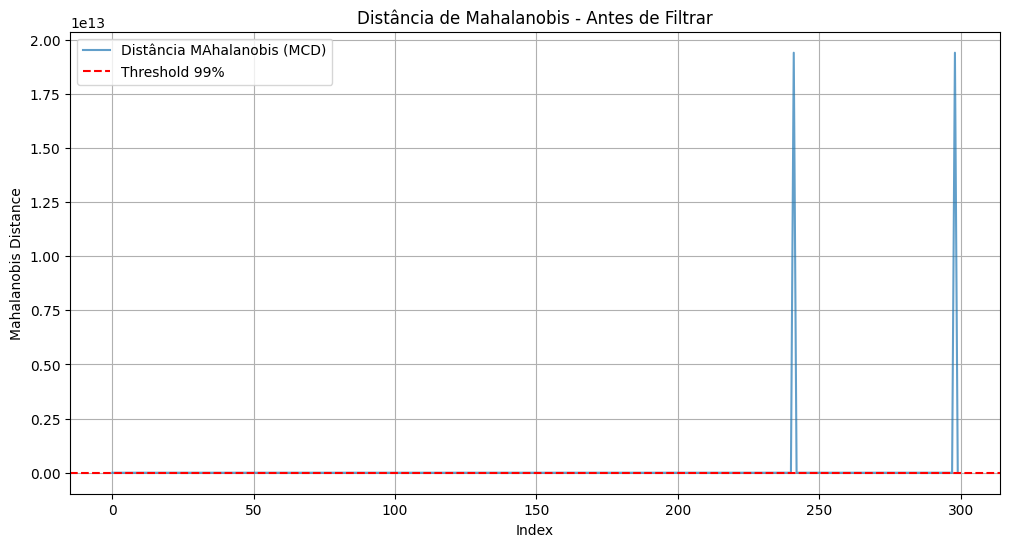

In [45]:
mcd = MinCovDet(support_fraction=0.8, random_state=42).fit(X_scaled)

robust_md = mcd.mahalanobis(X_scaled)

# Limite (99%)
threshold = chi2.ppf(0.99, df=X.shape[1])

outliers_mask = robust_md > threshold

plt.figure(figsize=(12, 6))
plt.plot(robust_md, label="Distância MAhalanobis (MCD)", alpha=0.7)
plt.axhline(threshold, color="red", linestyle="--", label="Threshold 99%")
plt.title("Distância de Mahalanobis - Antes de Filtrar")
plt.xlabel("Index")
plt.ylabel("Mahalanobis Distance")
plt.legend()
plt.grid(True)
plt.show()


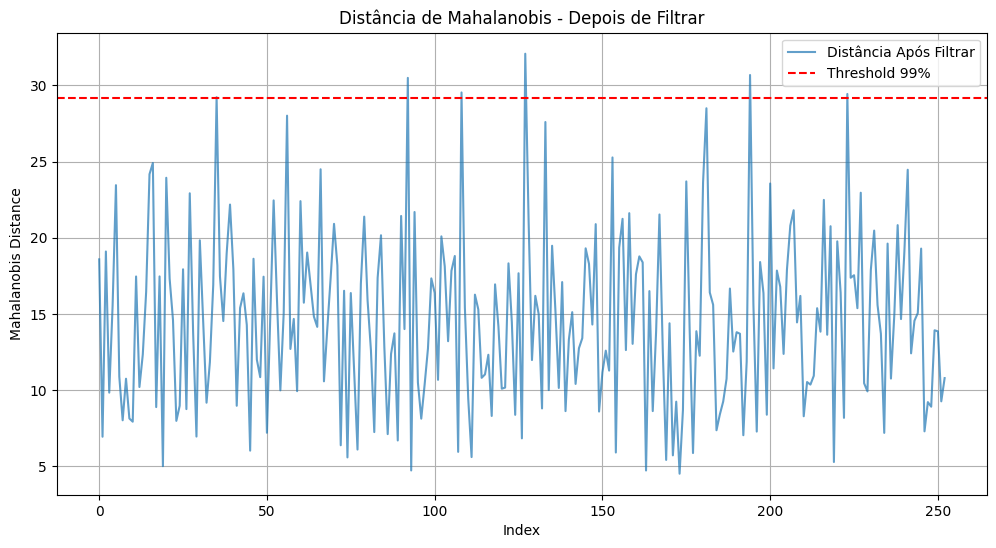

In [46]:
df_clean = df_imp.loc[~outliers_mask].reset_index(drop=True)
X_clean = df_clean.select_dtypes(include=[np.number])

X_scaled_clean = scaler.fit_transform(X_clean)

mcd_after = MinCovDet(support_fraction=0.8, random_state=42).fit(X_scaled_clean)
robust_md_after = mcd_after.mahalanobis(X_scaled_clean)

plt.figure(figsize=(12, 6))
plt.plot(robust_md_after, label="Distância Após Filtrar", alpha=0.7)
plt.axhline(threshold, color="red", linestyle="--", label="Threshold 99%")
plt.title("Distância de Mahalanobis - Depois de Filtrar")
plt.xlabel("Index")
plt.ylabel("Mahalanobis Distance")
plt.legend()
plt.grid(True)
plt.show()


In [47]:
print("Tamanho original:", df_imp.shape)
print("Tamanho sem outliers:", df_clean.shape)

df_clean.head()

Tamanho original: (300, 14)
Tamanho sem outliers: (253, 14)


,daily_active_users_per_1k,avg_session_duration,screens_per_session,conversion_rate,retention_30d,crash_rate_per_1k,avg_latency_ms,support_tickets_per_1k_users,bug_fix_time_days,deployment_frequency_per_month,nps_score,app_store_rating,revenue_per_user,marketing_cost_per_new_user
0,0.618467,6.503083,3.434506,36.091202,32.922874,5.119400,2.361667e+13,5.964748,4.913805,6.040890,10.048182,3.419485,9.223341,4.781570
1,0.618467,8.528490,6.017035,27.837943,33.373858,5.600387,2.329141e+13,7.822878,5.260977,6.417972,10.648048,4.321315,10.196807,3.923077
2,0.618467,7.778993,4.666500,21.258185,32.290021,2.761025,2.313537e+13,5.142395,3.140509,6.356848,11.214148,4.021621,7.300362,5.639880
3,0.618468,9.468923,6.603979,23.600300,33.285655,2.703203,2.339863e+13,6.363706,5.591864,5.506956,11.099667,3.737142,9.150650,4.677199
4,0.618467,8.242374,6.228929,30.387606,32.833325,4.748835,2.337535e+13,7.203755,7.903712,6.895600,11.194007,4.960483,9.981141,2.791379


In [48]:
"""
# Dataframe
X_full = df_imp.select_dtypes(include=[np.number]).dropna().to_numpy()

# Distâncias de Mahalanobis
robust_cov_before = MinCovDet().fit(X_full)

# Calcular as distâncias de Mahalanobis
robust_md = robust_cov_before.mahalanobis(X_full)

# Threshold
threshold = chi2.ppf(0.99, df=X_full.shape[1])

# Outlier mask 
outliers_mask = robust_md > threshold

# Filtrar outliers 
df_tratada = df_imp.loc[~outliers_mask].reset_index(drop=True)

X_after = df_tratada.select_dtypes(include=[np.number]).to_numpy()

# Covariancia depois de filtrar 
robust_cov_after = MinCovDet(support_fraction=0.8).fit(X_after)
robust_md_after = robust_cov_after.mahalanobis(X_after)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Antes de filtrar - Dados não normalizados
ax = axes[0]
ax.plot(robust_md, label="Robust MD (MCD)", alpha=0.7)
ax.axhline(threshold, color="red", linestyle="--", label="Threshold (99%)")
ax.set_title("Distância de Mahalanobis Antes de Filtrar")
ax.set_xlabel("Observation Index")
ax.set_ylabel("Distance")
ax.legend()
ax.grid(True)

# Depois de Filtrar - Dados normalizados 
ax = axes[1]

robust_md_after = robust_cov_after.mahalanobis(X_after)

ax.plot(robust_md_after, label="Robust MD (Depois)", alpha=0.7)
ax.axhline(threshold, color="red", linestyle="--", label="Threshold (99%)")
ax.set_title("Distância de Mahalanobis Depois de Filtrar")
ax.set_xlabel("Observation Index")
ax.set_ylabel("Distance")
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()
"""

'\n# Dataframe\nX_full = df_imp.select_dtypes(include=[np.number]).dropna().to_numpy()\n\n# Distâncias de Mahalanobis\nrobust_cov_before = MinCovDet().fit(X_full)\n\n# Calcular as distâncias de Mahalanobis\nrobust_md = robust_cov_before.mahalanobis(X_full)\n\n# Threshold\nthreshold = chi2.ppf(0.99, df=X_full.shape[1])\n\n# Outlier mask \noutliers_mask = robust_md > threshold\n\n# Filtrar outliers \ndf_tratada = df_imp.loc[~outliers_mask].reset_index(drop=True)\n\nX_after = df_tratada.select_dtypes(include=[np.number]).to_numpy()\n\n# Covariancia depois de filtrar \nrobust_cov_after = MinCovDet(support_fraction=0.8).fit(X_after)\nrobust_md_after = robust_cov_after.mahalanobis(X_after)\n\nfig, axes = plt.subplots(1, 2, figsize=(14, 6))\n\n# Antes de filtrar - Dados não normalizados\nax = axes[0]\nax.plot(robust_md, label="Robust MD (MCD)", alpha=0.7)\nax.axhline(threshold, color="red", linestyle="--", label="Threshold (99%)")\nax.set_title("Distância de Mahalanobis Antes de Filtrar")\nax

Como podemos reparar na primeira figura, que representa os valores da distãncia de Mahalanobis no dataset original, cada "pico" representa um outlier.

Já na segunda figura, com os valores da distância de Mahalanobis no dataset filtrado, existe muito menos "picos" estando a maioria dos valores dentro do threshold definido, qualquer valor acima de 99% é considerado como Outlier.

Daqui surge então o dataset sem os valores *Outliers*

In [49]:
df_clean.describe()

,daily_active_users_per_1k,avg_session_duration,screens_per_session,conversion_rate,retention_30d,crash_rate_per_1k,avg_latency_ms,support_tickets_per_1k_users,bug_fix_time_days,deployment_frequency_per_month,nps_score,app_store_rating,revenue_per_user,marketing_cost_per_new_user
count,2.530000e+02,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,6.184673e-01,8.677299,5.635707,28.310606,33.078048,4.182051,2.339761e+13,6.887647,5.801730,6.087030,11.218578,4.277754,9.243534,4.421223
std,3.836003e-07,1.255156,1.380766,7.558257,0.263495,1.140114,3.271880e+11,1.041737,1.387862,0.654450,0.528105,0.479824,0.754019,1.189269
min,6.184663e-01,5.253404,1.898322,6.936839,32.272576,1.067887,2.254033e+13,4.750419,2.073682,4.387138,9.866657,2.509663,7.300362,1.462152
25%,6.184670e-01,7.906708,4.698927,23.738796,32.908543,3.325328,2.315537e+13,6.115489,4.885135,5.611515,10.856927,3.907372,8.686288,3.552654
50%,6.184673e-01,8.741302,5.617667,28.105822,33.082528,4.122688,2.339620e+13,6.834778,5.803094,6.140358,11.204265,4.357529,9.278429,4.329968
75%,6.184676e-01,9.615004,6.617704,33.285726,33.281506,4.865461,2.362847e+13,7.632420,6.670136,6.517124,11.517865,4.661635,9.750099,5.282966
max,6.184683e-01,11.840306,9.820902,59.048866,33.711936,7.120094,2.433887e+13,9.609812,10.190699,7.955791,12.647606,4.994153,11.229487,7.652961


## 4. PCA

Agora, e depois de concluído o tratamento de dados sobre o *dataset* original, vamos passar para o *PCA*, *Principal Component Analysis*, este vai reduzir a dimensão do *dataset* mantendo grande parte da sua informação original.

Funciona da seguinte forma:
1. Identifica a "direção" das variâncias máximas no dataframe, "estas passsam a ser os principais componentes do mesmo;
2. O primeiro componente, PC1, engloba a maior parte da variância, PC2 a segunda maior e por aí diante;


## 4.1 Escolher o Número de PCs

Para escolher o número de PC que vamos calcular, iremos utilizar os seguintes métodos:
- Variabilidade Explicada
- Método de Kaiser
- Teste do Cotovelo

### 4.1.1 Variabilidade Explicada
Um dos métodos que podemos utilizar é o da Variabiliade Explicada, este funciona da seguinte forma:

1. Calcula-se a variância explicada por cada PC;
2. Depois, soma-se cumulativamente para ver quantos PCs são necessários para atingir, por exemplo, ≥ 80% da variabilidade total;

Nota: Pode ser arbitrário visto que o *threshold* escolhido não tem propriamente base fixa. 

In [50]:
## Implementação Variabilidade Explicada

### 4.1.2 Método de Kaiser
Outro método que podemos utilizar é o de Keiser, que funciona da seguinte forma:
1. Calcula-se a variância de cada PC
2. Todos os valores acima de 1 representam que o PC explica do que o "Original"

Nota: Pode manter demasiados PCs em datasets muito grandes.

In [51]:
## Implementação Método de Kaiser

### 4.1.3 Método do Cotovelo
O último método utilizado é o do Cotovelo:
1. Criamos um gráfico com as variâncias de cada PC por ordem decrescente;
2. Encontramos o "cotovelo" no mesmo, isto é, o ponto onde o declive da reta diminui significativamente;
3. O número de PCs escolhido é número destes que estejam antes do cotovelo

Nota: Nem sempre o cotovelo é evidente, sendo o método às vezes subjetivo.

In [52]:
## Implementação Método do Cotovelo

## 4.2 PCA

Depois de encontrarmos o número de PCs que se adequa ao nosso dataset passamos então ao cálculo dos mesmos.

#### NÃO ESTÁ FEITO PARA UTILIZAR O NÚMERO DE PCs QUE ENCONTRARMOS EM CIMA

In [54]:
'''
df = df_tratada

X = df.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA - 5 componentes neste caso
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

# Criar o novo dataframe com os valores gerados
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2','PC3','PC4','PC5'])

# Peso de cada variável em cada PC
loadings = pd.DataFrame(pca.components_.T, 
                        columns=['PC1','PC2','PC3','PC4','PC5'], 
                        index=X.columns)

top_n = 15 # Número de Variáveis a visualizar
all_top_vars = []

for pc in loadings.columns:
    print(f"\nMaiores Contribuintes do {pc}:")
    # Sort de maior para menor
    sorted_loadings = loadings[pc].abs().sort_values(ascending=False)
    print(sorted_loadings.head(top_n))
    # Variáveis para o HeatMap
    all_top_vars.extend(sorted_loadings.head(top_n).index)
'''

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Assumindo que df_tratada é o teu dataframe inicial
df = df_clean

# 1. Selecionar apenas colunas numéricas
X = df.select_dtypes(include=['float64', 'int64'])

# 2. Tratamento de NaNs (NOVO)
# O PCA não funciona com valores vazios. Preenchemos com a mediana.
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# 3. Escalar os dados (MANTIDO StandardScaler, que é o correto)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# 4. Aplicar PCA (ALTERADO)
# Em vez de 5, pedimos 90% da variância. O scikit-learn calcula o n_components sozinho.
pca = PCA(n_components=0.90) 
X_pca = pca.fit_transform(X_scaled)

# Número de componentes encontrados
n_pcs = pca.n_components_
print(f"O PCA selecionou {n_pcs} componentes para explicar 90% da variância.")

# 5. Criar DataFrame com nomes dinâmicos (ALTERADO)
# Gera nomes ['PC1', 'PC2', ..., 'PC13'] automaticamente
cols_pca = [f'PC{i+1}' for i in range(n_pcs)]
df_pca = pd.DataFrame(data=X_pca, columns=cols_pca)

# 6. Peso de cada variável (Loadings) (ALTERADO para usar nomes dinâmicos)
loadings = pd.DataFrame(pca.components_.T, 
                        columns=cols_pca, 
                        index=X.columns)

# Visualizar as variáveis mais importantes
top_n = 5  # Reduzi para 5 para focar no que realmente importa em cada PC
all_top_vars = []

for pc in loadings.columns:
    print(f"\nMaiores Contribuintes do {pc}:")
    # Mostra os top_n maiores valores absolutos (ignora se é positivo ou negativo)
    sorted_loadings = loadings[pc].abs().sort_values(ascending=False)
    print(sorted_loadings.head(top_n))
    
    all_top_vars.extend(sorted_loadings.head(top_n).index)

# Remover duplicados da lista de variáveis importantes se quiseres usar depois
unique_top_vars = list(set(all_top_vars))


O PCA selecionou 10 componentes para explicar 90% da variância.

Maiores Contribuintes do PC1:
revenue_per_user               0.441173
crash_rate_per_1k              0.386765
app_store_rating               0.377385
conversion_rate                0.366005
marketing_cost_per_new_user    0.340719
Name: PC1, dtype: float64

Maiores Contribuintes do PC2:
avg_session_duration            0.532768
daily_active_users_per_1k       0.434118
screens_per_session             0.362835
support_tickets_per_1k_users    0.343126
bug_fix_time_days               0.304846
Name: PC2, dtype: float64

Maiores Contribuintes do PC3:
crash_rate_per_1k               0.428104
retention_30d                   0.416372
avg_session_duration            0.372039
nps_score                       0.351466
support_tickets_per_1k_users    0.283116
Name: PC3, dtype: float64

Maiores Contribuintes do PC4:
bug_fix_time_days                 0.575342
deployment_frequency_per_month    0.455210
support_tickets_per_1k_users      0.34

Depois do PCA ser aplicado podemos ver as tabelas de cada PC e as variáveis que têm mais peso no mesmo.

Através do mapa de calor a seguir podemos obter uma melhor representação visual.


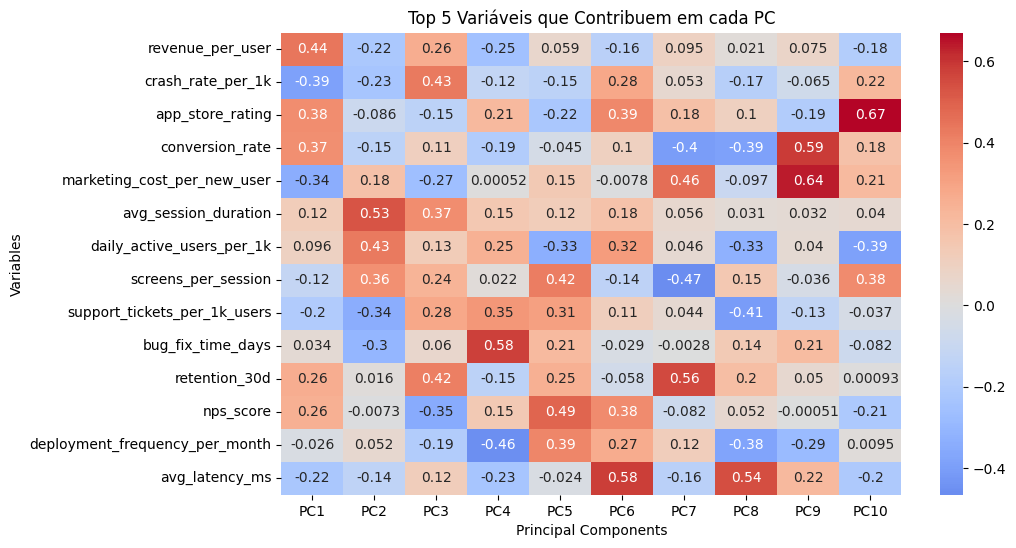

In [55]:
all_top_vars = list(dict.fromkeys(all_top_vars))
top_loadings = loadings.loc[all_top_vars]

plt.figure(figsize=(10,6))
sns.heatmap(top_loadings, annot=True, cmap="coolwarm", center=0)
plt.title(f"Top {top_n} Variáveis que Contribuem em cada PC")
plt.ylabel("Variables")
plt.xlabel("Principal Components")
plt.show()

!!!! ISTO TEM DE SER ALTERADO !!!!!


Os PCs avaliam as seguintes categorias:
- PC1: Experiência geral de um aluno;
- PC2: Suporte externo no desempenho académico;
- PC3: Motivação e suporte académico
- PC4: Motivação e satisfação geral
- PC5: Stress e gestão de tempo de estudo


In [57]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-1.604597,-1.797380,-0.217691,-2.332057,-1.861078,-1.377063,-0.280818,-0.184175,1.151325,-0.514374
1,0.099131,-0.558672,1.965538,-0.769750,-0.036943,-0.191388,0.778457,-0.795532,-0.664645,0.283626
2,-1.891867,1.913768,-3.933583,-0.455404,-1.605888,-0.539875,-0.817933,-0.594588,-0.522867,-0.099288
3,0.060369,1.684199,0.381925,0.369030,0.153633,-1.007066,0.139270,0.852935,0.414408,-1.042737
4,0.950218,-1.369485,0.168592,0.406399,0.306756,0.710114,-0.939431,-0.373346,-1.121201,0.777576


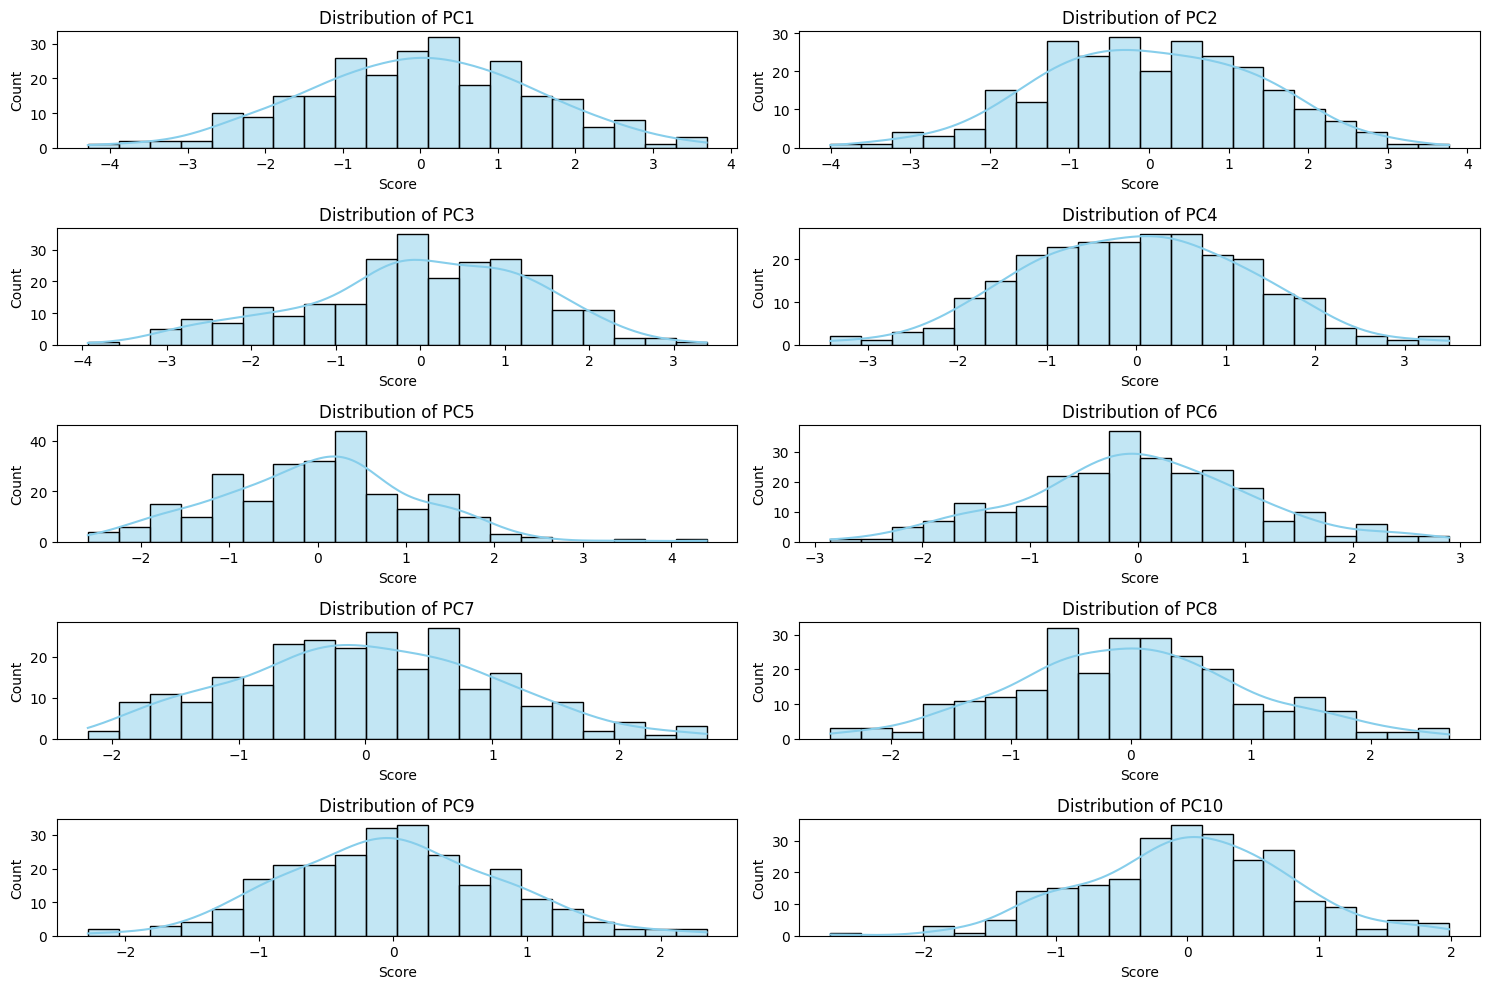

In [59]:
pcs = df_pca.columns
plt.figure(figsize=(15,10))

for i, pc in enumerate(pcs, 1):
    plt.subplot(5, 2, i)  # 3 rows x 2 columns layout
    sns.histplot(df_pca[pc], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {pc}')
    plt.xlabel('Score')
    plt.ylabel('Count')
    
plt.tight_layout()
plt.show()